In [2]:
import numpy as np
import time
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
font = {'family' : 'normal',
        'size'   : 24}

plt.rc('font', **font)

In [3]:
def create_starting_optic(thick,R,k=-1,N=100):
    z=np.linspace(0,thick,N) #solves the problem of not having enough points close to the origin
    r=np.sqrt(2*R*z-(k+1)*z**2) 
    optic=np.array([z,r])
    return optic

In [4]:
start_o = create_starting_optic(0.0064,0.1125,k=-0.8,N=100)
sor=start_o[1]

In [5]:
soz=np.copy(start_o[0])
signs=np.random.choice([-1,1],99)
dz=signs*1e-4
soz[1:]+=dz
print(soz)

[ 0.00000000e+00 -3.53535354e-05  2.92929293e-05  9.39393939e-05
  3.58585859e-04  4.23232323e-04  4.87878788e-04  3.52525253e-04
  4.17171717e-04  6.81818182e-04  5.46464646e-04  8.11111111e-04
  6.75757576e-04  9.40404040e-04  8.05050505e-04  8.69696970e-04
  9.34343434e-04  1.19898990e-03  1.26363636e-03  1.12828283e-03
  1.39292929e-03  1.45757576e-03  1.32222222e-03  1.58686869e-03
  1.45151515e-03  1.71616162e-03  1.58080808e-03  1.64545455e-03
  1.91010101e-03  1.77474747e-03  2.03939394e-03  2.10404040e-03
  2.16868687e-03  2.03333333e-03  2.09797980e-03  2.16262626e-03
  2.42727273e-03  2.29191919e-03  2.35656566e-03  2.42121212e-03
  2.68585859e-03  2.75050505e-03  2.81515152e-03  2.67979798e-03
  2.94444444e-03  3.00909091e-03  2.87373737e-03  2.93838384e-03
  3.00303030e-03  3.06767677e-03  3.33232323e-03  3.39696970e-03
  3.26161616e-03  3.32626263e-03  3.59090909e-03  3.65555556e-03
  3.52020202e-03  3.78484848e-03  3.64949495e-03  3.71414141e-03
  3.77878788e-03  4.04343

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


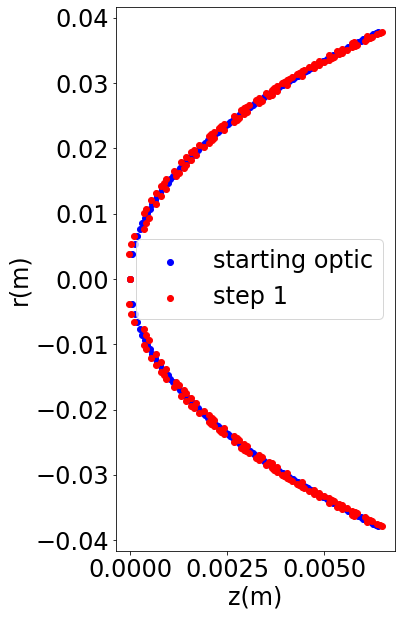

In [6]:
plt.figure(figsize=(5,10))
plt.scatter(start_o[0],start_o[1],c='b',label='starting optic')
plt.scatter(start_o[0],-1*start_o[1],c='b')

plt.scatter(soz,start_o[1],c='r',label='step 1')
plt.scatter(soz,-1*start_o[1],c='r')
plt.xlabel('z(m)')
plt.ylabel('r(m)')
plt.legend()
#plt.savefig('step_1')
plt.show()

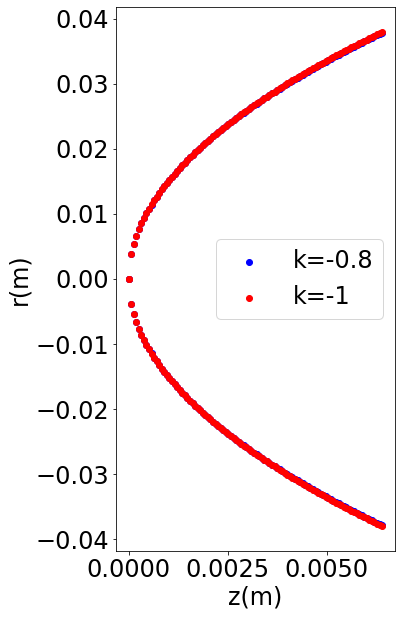

In [7]:
k08 = create_starting_optic(0.0064,0.1125,k=-0.8,N=100)
k1= create_starting_optic(0.0064,0.1125,k=-1,N=100)

plt.figure(figsize=(5,10))
plt.scatter(k08[0],k08[1],c='b',label='k=-0.8')
plt.scatter(k08[0],-1*k08[1],c='b')

plt.scatter(k1[0],k1[1],c='r',label='k=-1')
plt.scatter(k1[0],-1*k1[1],c='r')
plt.xlabel('z(m)')
plt.ylabel('r(m)')
plt.legend()
plt.savefig('diff_k')
plt.show()

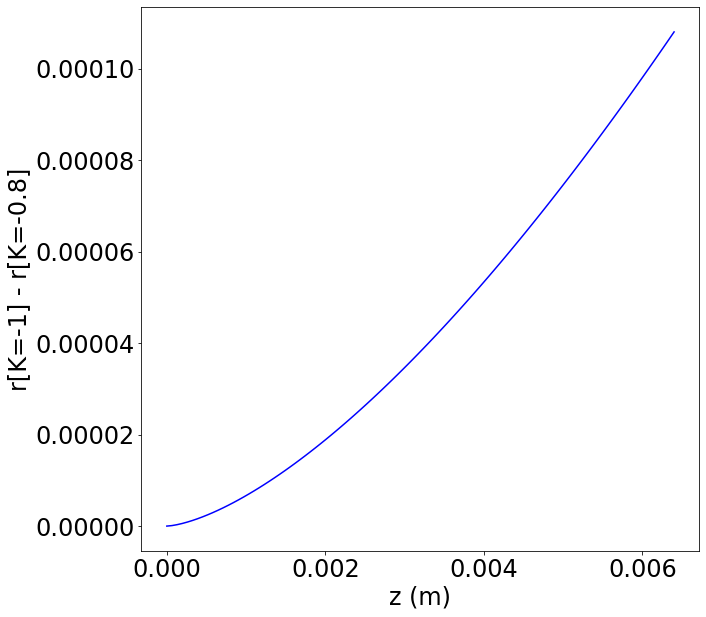

In [10]:
plt.figure(figsize=(10,10))
plt.plot(k08[0],k1[1]-k08[1],c='b',label='k=-0.8')
plt.xlabel("z (m)")
plt.ylabel("r[K=-1] - r[K=-0.8]")
plt.show()

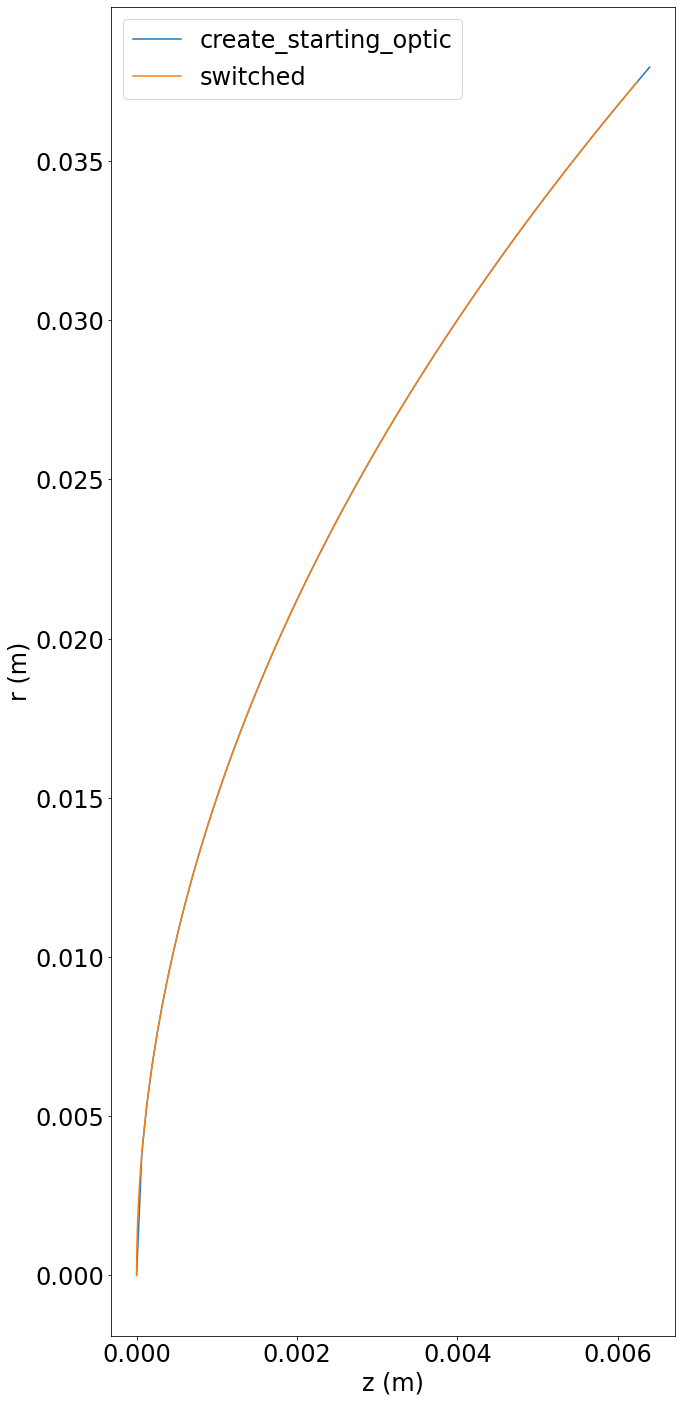

In [11]:
r=np.linspace(0,0.0375,100)
R=0.1125
z08=r**2/(R+np.sqrt(R**2-(1-0.8)*r**2))
z1=r**2/(R+np.sqrt(R**2-(1-1)*r**2))
plt.figure(figsize=(10,20))
plt.plot(k1[0],k1[1],label='create_starting_optic')
plt.plot(z1,r,label='switched')
plt.xlabel("z (m)")
plt.ylabel("r (m)")
plt.legend()
plt.savefig("rotate")
plt.tight_layout()
plt.show()

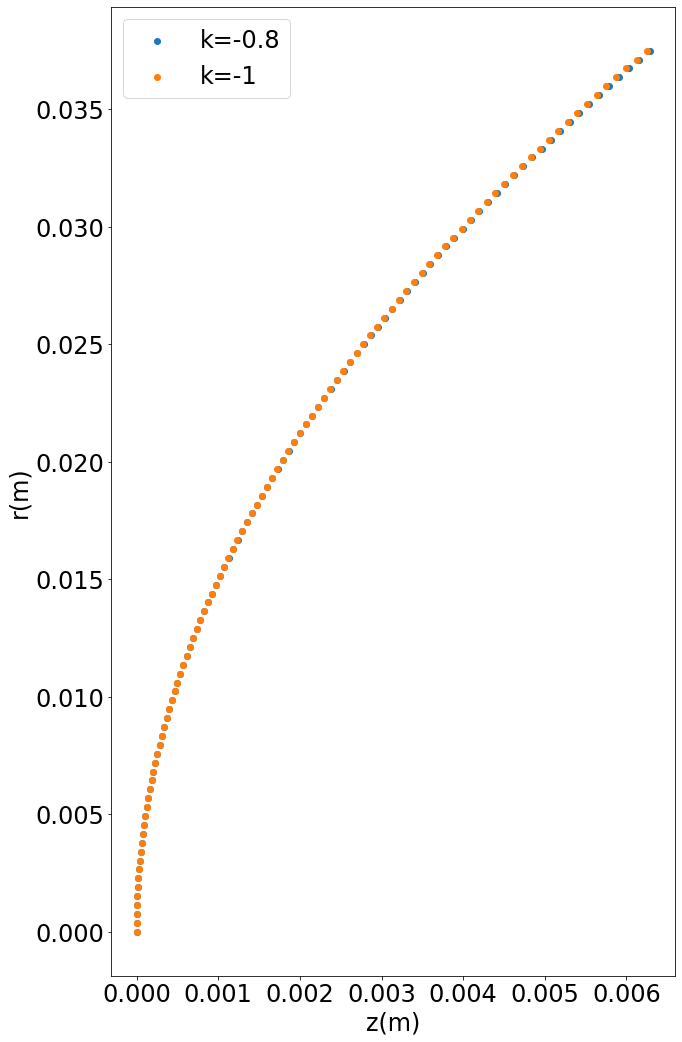

In [20]:
plt.figure(figsize=(10,15))
plt.scatter(z08,r,label='k=-0.8')
plt.scatter(z1,r,label='k=-1')

plt.xlabel('z(m)')
plt.ylabel('r(m)')
plt.legend()
plt.tight_layout()

plt.savefig('k_comp')
plt.show()

In [10]:
len(z1)

100

In [18]:
z1-z08

array([ 0.00000000e+00, -3.61465811e-13, -5.78347265e-12, -2.92789962e-11,
       -9.25368212e-11, -2.25922279e-10, -4.68478280e-10, -8.67926642e-10,
       -1.48066972e-09, -2.37179230e-09, -3.61506385e-09, -5.29294102e-09,
       -7.49657042e-09, -1.03257917e-08, -1.38891412e-08, -1.83038551e-08,
       -2.36958740e-08, -3.01998470e-08, -3.79591360e-08, -4.71258210e-08,
       -5.78607052e-08, -7.03333202e-08, -8.47219321e-08, -1.01213547e-07,
       -1.20003920e-07, -1.41297556e-07, -1.65307723e-07, -1.92256457e-07,
       -2.22374568e-07, -2.55901650e-07, -2.93086088e-07, -3.34185069e-07,
       -3.79464585e-07, -4.29199450e-07, -4.83673302e-07, -5.43178618e-07,
       -6.08016721e-07, -6.78497793e-07, -7.54940882e-07, -8.37673916e-07,
       -9.27033713e-07, -1.02336599e-06, -1.12702539e-06, -1.23837547e-06,
       -1.35778872e-06, -1.48564660e-06, -1.62233952e-06, -1.76826686e-06,
       -1.92383703e-06, -2.08946740e-06, -2.26558439e-06, -2.45262344e-06,
       -2.65102905e-06, -

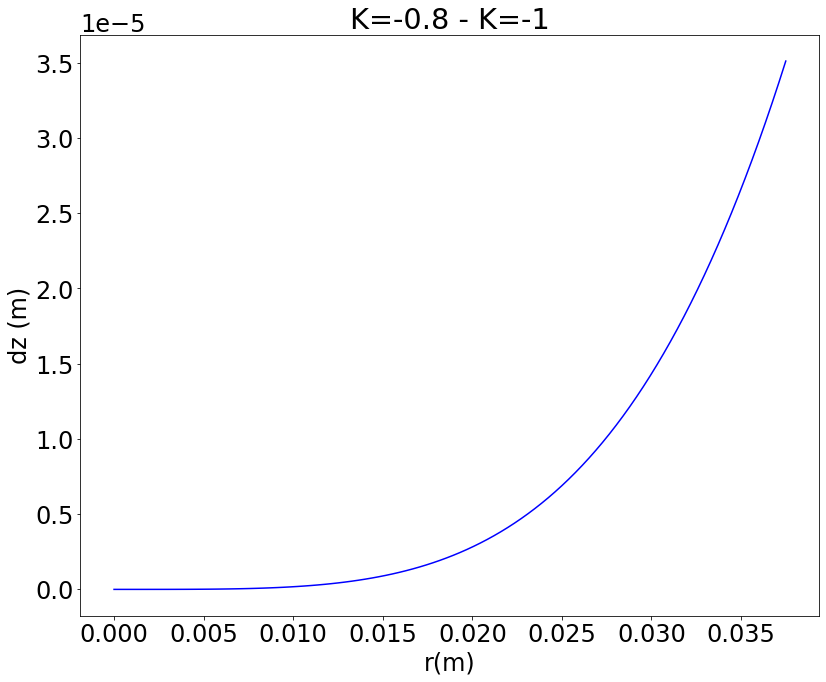

In [19]:
plt.figure(figsize=(12,10))

plt.plot(r,z08-z1,c='b',label='k=-0.8')
plt.xlabel('r(m)')
plt.ylabel('dz (m)')
plt.title("K=-0.8 - K=-1")
plt.tight_layout()
plt.savefig("dz")

plt.show()

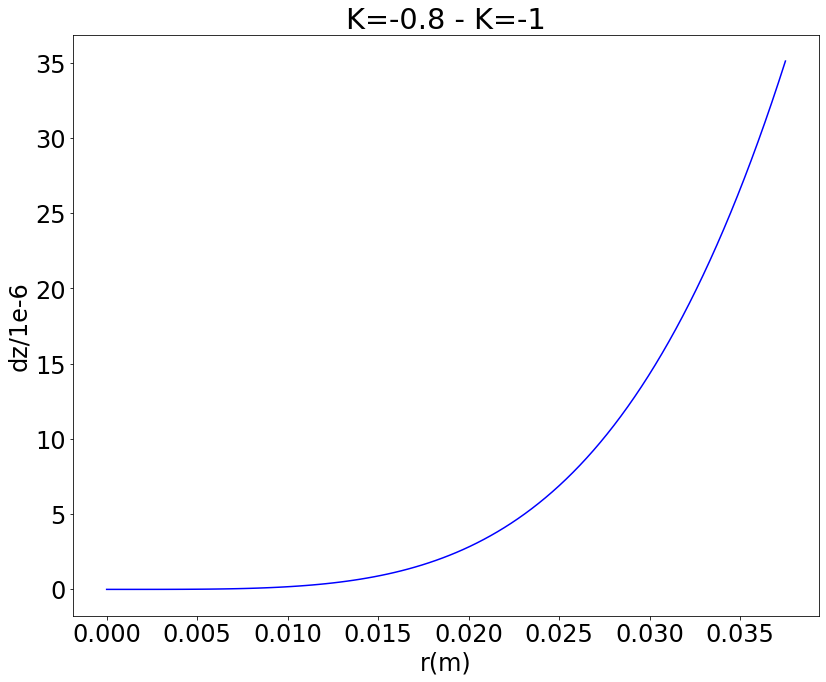

In [39]:
plt.figure(figsize=(12,10))

plt.plot(r,(z08-z1)/1e-6,c='b',label='k=-0.8')
plt.xlabel('r(m)')
plt.ylabel('dz/1e-6')
plt.title("K=-0.8 - K=-1")
plt.tight_layout()
plt.savefig("dz_norm")

plt.show()